### K-Means Color Segmentation for Images

This algorithm performs segmentation based on colors by assuming that objects are colored distinctively. It might not be sensitive about color and bright variations across the objects, but performs really well for the objects with distinct colors. It can also be a useful tool for foreground or background segmentation. K-means is a unsupervised machine learning algorithm and used for color segmentation as prior information is unknown regarding the colors.

#### K-Means Clustering

K-means clustering is a clustering method that subdivides a single cluster or a collection of data points into K different clusters or groups. The algorithm analyzes the data to find organically similar data points and assigns each point to a cluster that consists of points with similar characteristics. Each cluster can then be used to label the data into different classes based on the characteristics of the data (https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/)



In [187]:
from IPython.display import Image
Image(url= "https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif",width=300, height=300)

You must import below libraries before running. Scikit learn contain many useful ML libraries including K-means. Color segmentation is perfomed by grouping every pixel into a different clusters based on their RGB values. 

In [191]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import pandas as pd

In [192]:
# Displaying the image in a large window
def display_image(img):
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

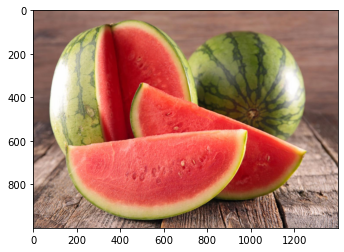

In [193]:
# Reading the image from local file
img = cv2.imread('watermelon.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [181]:
# Getting R,G,B, components of the image, and put them all into X for clustering (3 dimension)
w,h,k = img.shape

red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]

X = np.zeros((w*h,k),np.uint8)

X[:,0]=red.reshape(1,-1)
X[:,1]=green.reshape(1,-1)
X[:,2]=blue.reshape(1,-1)

#### Choosing The Right Number Of Clusters
The number of clusters that we choose for a given dataset cannot be random. Each cluster is formed by calculating and comparing the distances of data points within a cluster to its centroid. An ideal way to figure out the right number of clusters would be to calculate the Within-Cluster-Sum-of-Squares (WCSS). 

(https://analyticsindiamag.com/beginners-guide-to-k-means-clustering/)

In [188]:
# Importing the sklearn and Kmeans libraries 
# Here 10 is an iteration value to find out best cluster size. But we will stick with 4 here  
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

The elbow method is very useful to find out correct number of clusters. Below figure
shows that the WCSS value gets minimized after 7 th. cluster. But we will stick with 4

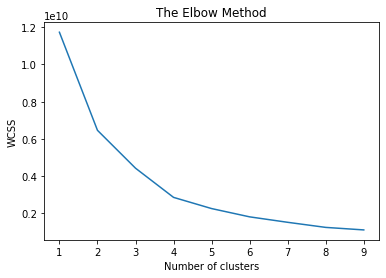

In [189]:
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [167]:
# We created a kmeans object using 4 clusters
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [190]:
# Clustered image is created
template = np.zeros((w*h,1),dtype = np.uint8)
template = template.reshape(1,-1)

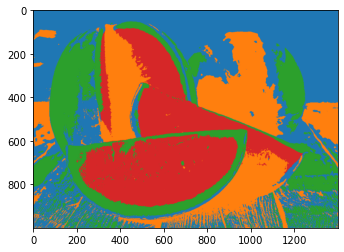

In [169]:
# Four color regions were labeled. It can obviously be seen that some regions
# showing slight color or bright variations were clustered mistakenly.

first = np.where(y_kmeans == 0)
second = np.where(y_kmeans == 1)
third = np.where(y_kmeans == 2)
fourth = np.where(y_kmeans == 3)

for ind in first:
    template[0][ind]=0
    
for ind in second:
    template[0][ind]=1

for ind in third:
    template[0][ind]=2
    
for ind in fourth:
    template[0][ind]=3
    
    
finalimg=template.reshape(w,h)
segments = np.zeros((w,h,3),dtype=np.uint8)

segments[finalimg==0]=(31.0, 119.0, 180.0)
segments[finalimg==1]=(255.0, 127.0, 14.0)
segments[finalimg==2]=(44.0, 160.0, 44.0)
segments[finalimg==3]=(214.0, 39.0, 40.0)

plt.imshow(segments)

In [195]:
cv2.imwrite('segmented.jpg',segments)

True